In [8]:
## KANGNI-SOUKPE AKOKO NADEGE


## Projet : Data appliquée au secteur de la santé (M1-DA)

## Projet M1 : Prédiction des hospitalisations COVID-19 en France
## Utilisation des données ouvertes pour analyser et prédire l'évolution des
## hospitalisations en France selon les classes d’âge.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as olt
import seaborn as sns

In [10]:
# Chargement des données



df = pd.read_excel('/content/drive/MyDrive/covid.xlsx')

In [11]:

## Afficher un aperçu des données.
df

,fra,jour,clage_90,PourAvec,tx_indic_7J_DC,tx_indic_7J_hosp,tx_indic_7J_SC,tx_prev_hosp,tx_prev_SC
0,FR,2020-03-07,0,0,0.000000,0.000000,0.00000,1.169634,0.144528
1,FR,2020-03-07,0,1,NaN,0.000000,0.00000,0.000000,0.000000
2,FR,2020-03-07,0,2,NaN,0.000000,0.00000,0.000000,0.000000
3,FR,2020-03-08,0,0,0.000000,0.000000,0.00000,1.303732,0.175818
4,FR,2020-03-08,0,1,NaN,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
39826,FR,2023-06-25,90,1,NaN,2.750531,0.10579,97.114915,1.375266
39827,FR,2023-06-25,90,2,NaN,1.692635,0.00000,54.270100,0.211579
39828,FR,2023-06-26,90,0,0.423159,4.125797,0.10579,151.702384,1.481055
39829,FR,2023-06-26,90,1,NaN,2.644742,0.10579,97.432284,1.269476


In [12]:
# Vérification des valeurs manquantes

missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)


Valeurs manquantes par colonne :
fra                     0
jour                    0
clage_90                0
PourAvec                0
tx_indic_7J_DC      26554
tx_indic_7J_hosp        0
tx_indic_7J_SC          0
tx_prev_hosp            0
tx_prev_SC              0
dtype: int64


In [13]:
## Suppression des valeurs manquantes par la moyenne

df.drop(columns=['tx_indic_7J_DC'], inplace=True)




In [14]:
## Vérifier s'il reste des valeurs manquantes

df.isna().sum()


,0
fra,0
jour,0
clage_90,0
PourAvec,0
tx_indic_7J_hosp,0
tx_indic_7J_SC,0
tx_prev_hosp,0
tx_prev_SC,0


In [15]:
## Vérifier si il y a des doublons

df.duplicated().sum()



0

In [16]:
## Afficher les doublons

df[df.duplicated()]


,fra,jour,clage_90,PourAvec,tx_indic_7J_hosp,tx_indic_7J_SC,tx_prev_hosp,tx_prev_SC


In [17]:
# Convertir la colonne 'Jour' en datetime

df['jour'] = pd.to_datetime(df['jour'])


In [18]:
## Vérifier si la conversion a marcher

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39831 entries, 0 to 39830
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fra               39831 non-null  object        
 1   jour              39831 non-null  datetime64[ns]
 2   clage_90          39831 non-null  int64         
 3   PourAvec          39831 non-null  int64         
 4   tx_indic_7J_hosp  39831 non-null  float64       
 5   tx_indic_7J_SC    39831 non-null  float64       
 6   tx_prev_hosp      39831 non-null  float64       
 7   tx_prev_SC        39831 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 2.4+ MB


In [19]:
## Création d’une colonne semaine pour regrouper les données par période

df['semaine'] = df['jour'].dt.to_period('W')


In [20]:
## Regrouper tes données par semaine

df_grouped = df.groupby('semaine').agg({'tx_indic_7J_hosp': 'sum', 'tx_indic_7J_SC': 'sum', 'tx_prev_hosp': 'sum', 'tx_prev_SC': 'sum'})


In [21]:
df

,fra,jour,clage_90,PourAvec,tx_indic_7J_hosp,tx_indic_7J_SC,tx_prev_hosp,tx_prev_SC,semaine
0,FR,2020-03-07,0,0,0.000000,0.00000,1.169634,0.144528,2020-03-02/2020-03-08
1,FR,2020-03-07,0,1,0.000000,0.00000,0.000000,0.000000,2020-03-02/2020-03-08
2,FR,2020-03-07,0,2,0.000000,0.00000,0.000000,0.000000,2020-03-02/2020-03-08
3,FR,2020-03-08,0,0,0.000000,0.00000,1.303732,0.175818,2020-03-02/2020-03-08
4,FR,2020-03-08,0,1,0.000000,0.00000,0.000000,0.000000,2020-03-02/2020-03-08
...,...,...,...,...,...,...,...,...,...
39826,FR,2023-06-25,90,1,2.750531,0.10579,97.114915,1.375266,2023-06-19/2023-06-25
39827,FR,2023-06-25,90,2,1.692635,0.00000,54.270100,0.211579,2023-06-19/2023-06-25
39828,FR,2023-06-26,90,0,4.125797,0.10579,151.702384,1.481055,2023-06-26/2023-07-02
39829,FR,2023-06-26,90,1,2.644742,0.10579,97.432284,1.269476,2023-06-26/2023-07-02


In [22]:

# Agrégation par semaine et classe d'âge
df_grouped = df.groupby(['semaine', 'clage_90']).agg({
    'tx_indic_7J_hosp': 'sum',
    'tx_indic_7J_SC': 'sum',
    'tx_prev_hosp': 'sum',
    'tx_prev_SC': 'sum'
}).reset_index()

# Afficher les résultats
print(df_grouped.head())


                 semaine  clage_90  tx_indic_7J_hosp  tx_indic_7J_SC  \
0  2020-03-02/2020-03-08         0               0.0             0.0   
1  2020-03-02/2020-03-08         9               0.0             0.0   
2  2020-03-02/2020-03-08        19               0.0             0.0   
3  2020-03-02/2020-03-08        29               0.0             0.0   
4  2020-03-02/2020-03-08        39               0.0             0.0   

   tx_prev_hosp  tx_prev_SC  
0      2.473367    0.320346  
1      0.128813    0.051525  
2      0.155941    0.023991  
3      0.508240    0.053499  
4      0.554526    0.072329  


In [23]:
## 3.2️- Analyse exploratoire (EDA)

In [24]:
# Créer une colonne 'semaine' avec le numéro de semaine
df['semaine'] = (df['jour'] - df['jour'].min()).dt.days // 7 + 1

# Afficher un exemple pour vérifier
print(df[['jour', 'semaine']].head())

        jour  semaine
0 2020-03-07        1
1 2020-03-07        1
2 2020-03-07        1
3 2020-03-08        1
4 2020-03-08        1


In [25]:
df

,fra,jour,clage_90,PourAvec,tx_indic_7J_hosp,tx_indic_7J_SC,tx_prev_hosp,tx_prev_SC,semaine
0,FR,2020-03-07,0,0,0.000000,0.00000,1.169634,0.144528,1
1,FR,2020-03-07,0,1,0.000000,0.00000,0.000000,0.000000,1
2,FR,2020-03-07,0,2,0.000000,0.00000,0.000000,0.000000,1
3,FR,2020-03-08,0,0,0.000000,0.00000,1.303732,0.175818,1
4,FR,2020-03-08,0,1,0.000000,0.00000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...
39826,FR,2023-06-25,90,1,2.750531,0.10579,97.114915,1.375266,173
39827,FR,2023-06-25,90,2,1.692635,0.00000,54.270100,0.211579,173
39828,FR,2023-06-26,90,0,4.125797,0.10579,151.702384,1.481055,173
39829,FR,2023-06-26,90,1,2.644742,0.10579,97.432284,1.269476,173


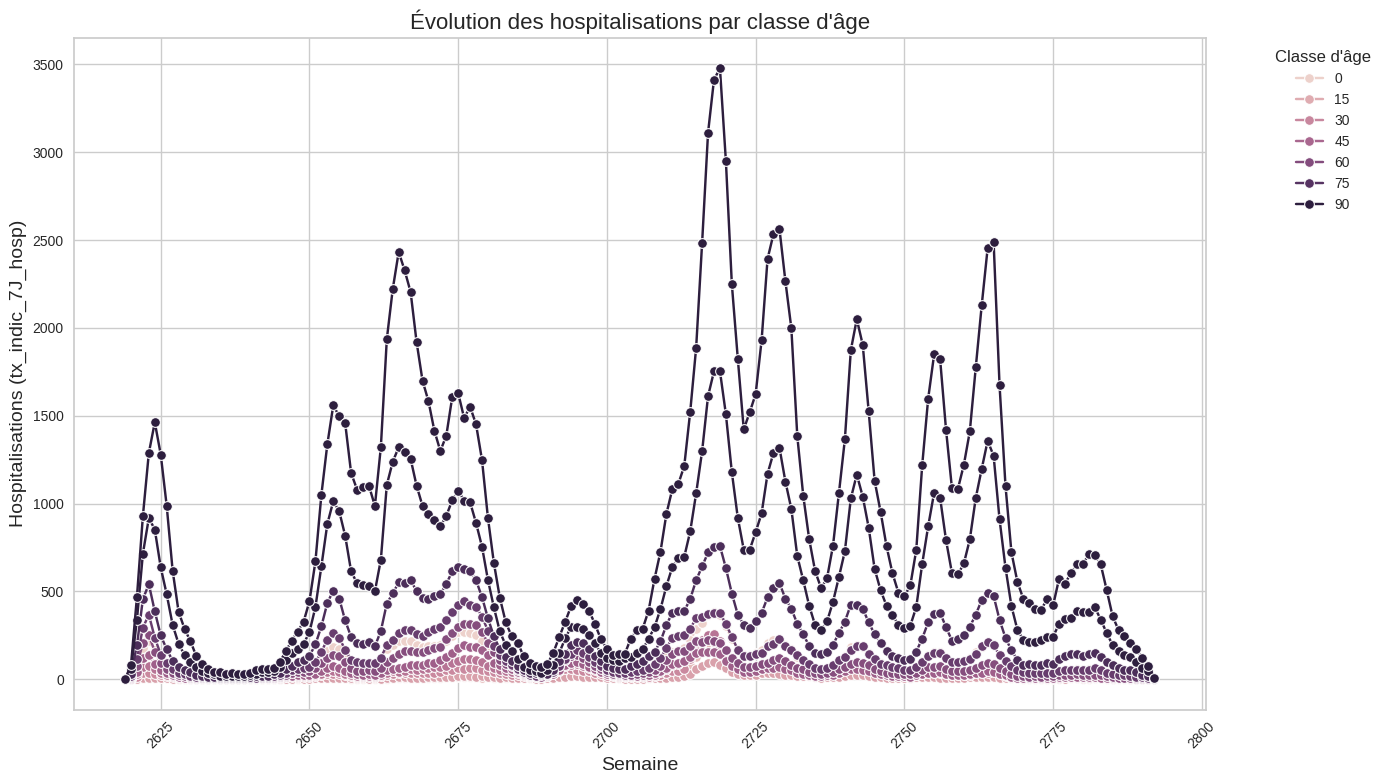

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la colonne 'semaine' en entier
df_grouped['semaine'] = df_grouped['semaine'].astype(int)

# Maintenant, crée le graphique
plt.figure(figsize=(14, 8))

sns.lineplot(data=df_grouped, x='semaine', y='tx_indic_7J_hosp', hue='clage_90', marker='o')

# Ajouter un titre et des labels
plt.title('Évolution des hospitalisations par classe d\'âge', fontsize=16)
plt.xlabel('Semaine', fontsize=14)
plt.ylabel('Hospitalisations (tx_indic_7J_hosp)', fontsize=14)

# Rotation des labels pour les rendre lisibles
plt.xticks(rotation=45)

# Afficher la légende
plt.legend(title='Classe d\'âge', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuster l'affichage pour que tout soit visible
plt.tight_layout()

# Afficher le graphique
plt.show()


In [27]:
## Comparaison des tendances saisonnières



In [28]:
df

,fra,jour,clage_90,PourAvec,tx_indic_7J_hosp,tx_indic_7J_SC,tx_prev_hosp,tx_prev_SC,semaine
0,FR,2020-03-07,0,0,0.000000,0.00000,1.169634,0.144528,1
1,FR,2020-03-07,0,1,0.000000,0.00000,0.000000,0.000000,1
2,FR,2020-03-07,0,2,0.000000,0.00000,0.000000,0.000000,1
3,FR,2020-03-08,0,0,0.000000,0.00000,1.303732,0.175818,1
4,FR,2020-03-08,0,1,0.000000,0.00000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...
39826,FR,2023-06-25,90,1,2.750531,0.10579,97.114915,1.375266,173
39827,FR,2023-06-25,90,2,1.692635,0.00000,54.270100,0.211579,173
39828,FR,2023-06-26,90,0,4.125797,0.10579,151.702384,1.481055,173
39829,FR,2023-06-26,90,1,2.644742,0.10579,97.432284,1.269476,173


In [29]:
# Extraire le mois de la date
df['mois'] = df['jour'].dt.month


# Ajouter une colonne "saison" basée sur les mois
def get_saison(month):
    if month in [12, 1, 2]:
        return 'Hiver'
    elif month in [3, 4, 5]:
        return 'Printemps'
    elif month in [6, 7, 8]:
        return 'Été'
    else:
        return 'Automne'

df['saison'] = df['mois'].apply(get_saison)


In [30]:
# Agrégation par saison, pour voir la tendance par saison
df_seasonal = df.groupby(['saison', 'clage_90']).agg({
    'tx_indic_7J_hosp': 'sum',
    'tx_indic_7J_SC': 'sum',
    'tx_prev_hosp': 'sum',
    'tx_prev_SC': 'sum'
}).reset_index()


print(df_seasonal.head())

    saison  clage_90  tx_indic_7J_hosp  tx_indic_7J_SC  tx_prev_hosp  \
0  Automne         0       3168.883718      467.833932   9246.804156   
1  Automne         9        603.591182       72.931176    625.246962   
2  Automne        19        270.397876       29.119379    483.450467   
3  Automne        29        862.973014       84.972647   1359.670138   
4  Automne        39       1112.982171      163.029915   1968.895600   

    tx_prev_SC  
0  1027.544749  
1   107.659806  
2    47.652834  
3   143.543376  
4   328.929764  


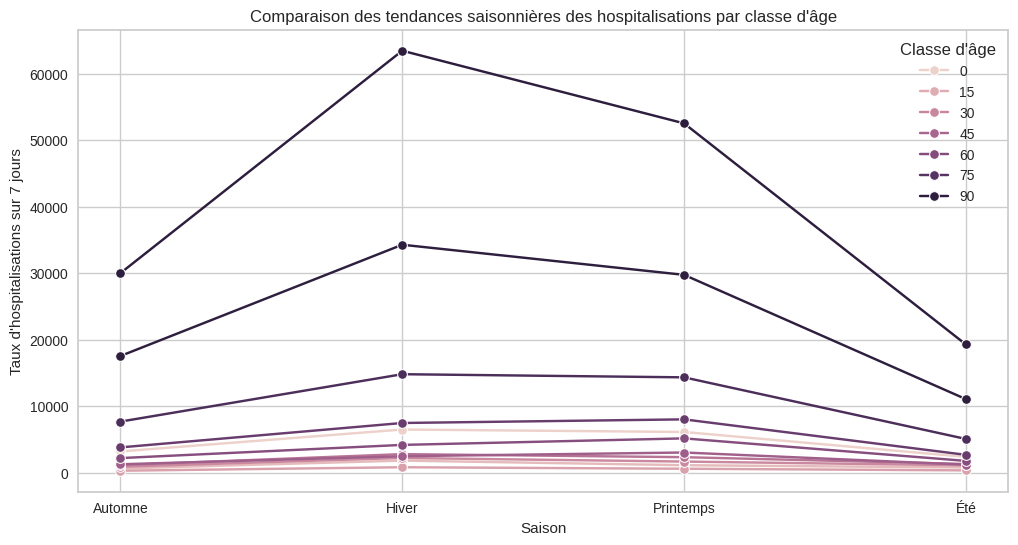

In [31]:
## visualisation d'une comparaison des tendances saisonnières

import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique linéaire pour comparer les tendances saisonnières par classe d'âge
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_seasonal, x='saison', y='tx_indic_7J_hosp', hue='clage_90', marker='o')

# Ajouter un titre et des labels
plt.title('Comparaison des tendances saisonnières des hospitalisations par classe d\'âge')
plt.xlabel('Saison')
plt.ylabel('Taux d\'hospitalisations sur 7 jours')
plt.legend(title='Classe d\'âge')

# Afficher le graphique
plt.show()


In [32]:
### Identification des pics d’hospitalisation

In [33]:
# Calcul de la moyenne et de l'écart-type pour chaque classe d'âge

mean_hosp = df.groupby('clage_90')['tx_indic_7J_hosp'].mean()
std_hosp = df.groupby('clage_90')['tx_indic_7J_hosp'].std()

seuil = 2

# Identifier les lignes où le taux d'hospitalisation dépasse ce seuil
df['pic_hosp'] = df.apply(lambda row: row['tx_indic_7J_hosp'] > mean_hosp[row['clage_90']] + seuil * std_hosp[row['clage_90']], axis=1)

# Afficher les lignes correspondant aux pics
df_pics = df[df['pic_hosp'] == True]

# Afficher les premiers résultats pour vérifier
print(df_pics[['fra', 'jour', 'clage_90', 'tx_indic_7J_hosp']].head())


   fra       jour  clage_90  tx_indic_7J_hosp
48  FR 2020-03-23         0         18.471282
51  FR 2020-03-24         0         20.876110
54  FR 2020-03-25         0         23.444835
57  FR 2020-03-26         0         25.894362
60  FR 2020-03-27         0         28.548017


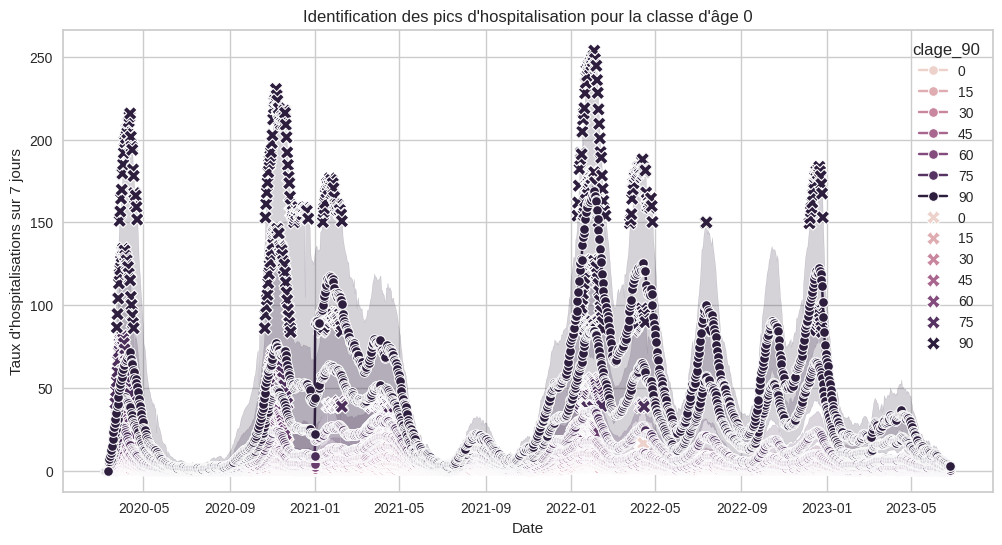

In [35]:
## Visualisation du pics d'hospitalisation

import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique des hospitalisations pour toutes les dates
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='jour', y='tx_indic_7J_hosp', hue='clage_90', marker='o')

# Ajouter les pics d'hospitalisation identifiés
sns.scatterplot(data=df_pics, x='jour', y='tx_indic_7J_hosp', hue='clage_90', marker='X', s=100, color='red')

# Ajouter un titre et des labels
plt.title('Identification des pics d\'hospitalisation pour la classe d\'âge 0')
plt.xlabel('Date')
plt.ylabel('Taux d\'hospitalisations sur 7 jours')

# Afficher le graphique
plt.show()


In [36]:
## Analyse de la corrélation entre les hospitalisations et les soins critiques



In [37]:
# Calcul de la corrélation de Pearson entre les hospitalisations et les soins critiques

correlation = df['tx_indic_7J_hosp'].corr(df['tx_indic_7J_SC'])
print(f"Corrélation entre hospitalisations et soins critiques : {correlation}")


Corrélation entre hospitalisations et soins critiques : 0.5686092700220383


In [38]:
##  les hospitalisations et les soins critiques sont liés, mais d'autres facteurs peuvent également influencer les soins critiques
##  indépendamment des hospitalisations

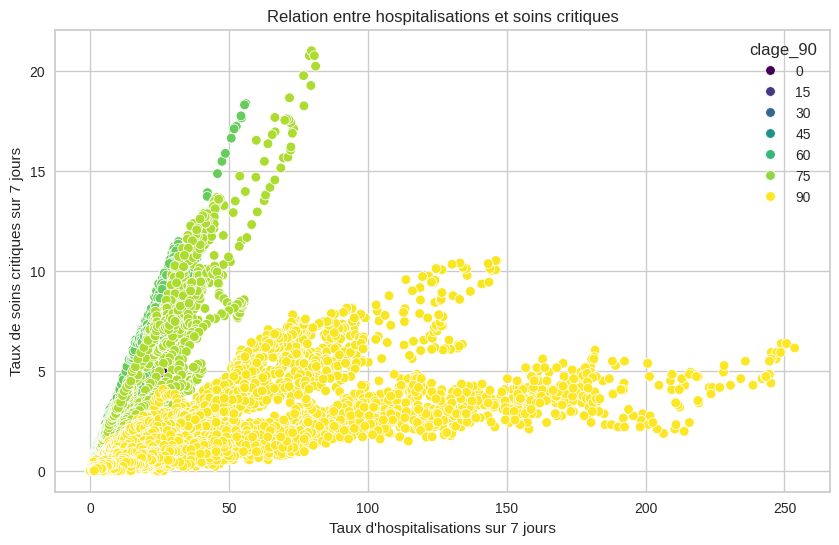

In [39]:
## Visualisation de la correlation

import seaborn as sns
import matplotlib.pyplot as plt

# Créer un graphique de dispersion pour visualiser la relation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tx_indic_7J_hosp', y='tx_indic_7J_SC', hue='clage_90', palette='viridis')

# Ajouter un titre et des labels
plt.title('Relation entre hospitalisations et soins critiques')
plt.xlabel('Taux d\'hospitalisations sur 7 jours')
plt.ylabel('Taux de soins critiques sur 7 jours')

# Afficher le graphique
plt.show()


In [40]:
## Explication : lorsqu'il y a une augmentation du taux d'hospitalisations, il y a aussi une tendance à voir une augmentation des soins critiques

In [41]:


## 3.3-Modélisation prédictive

## Utilisation de plusieurs modèles pour prédire les hospitalisations à court terme :



In [42]:

##  Modèle ARIMA : Analyse des séries temporelles pour détecter les tendances


In [43]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Appliquer le test de Dickey-Fuller sur la colonne 'tx_indic_7J_hosp' de df_grouped
result = adfuller(df_grouped['tx_indic_7J_hosp'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

## Appliquer une différenciation

if result[1] > 0.05:
   df_grouped = df_grouped.diff().dropna()

ADF Statistic: -5.612529393656655
p-value: 1.1944752713554315e-06


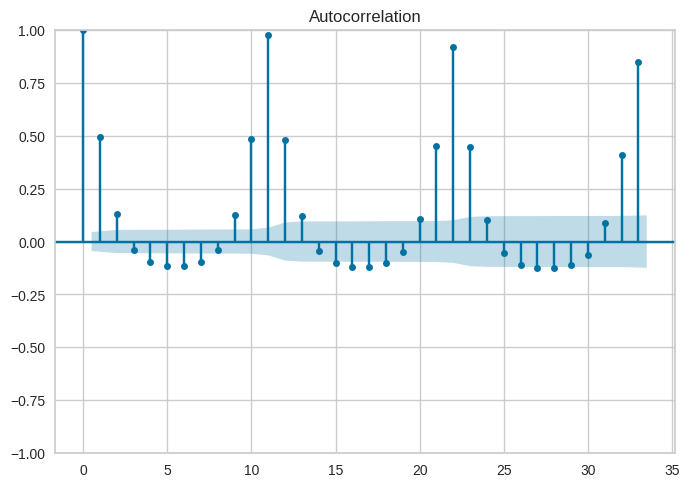

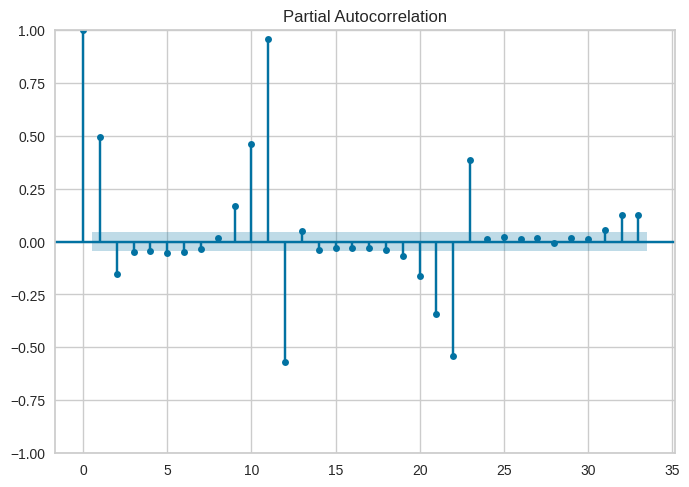

                               SARIMAX Results                                
Dep. Variable:       tx_indic_7J_hosp   No. Observations:                 1914
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13861.075
Date:                Wed, 26 Mar 2025   AIC                          27728.150
Time:                        13:03:10   BIC                          27744.820
Sample:                             0   HQIC                         27734.285
                               - 1914                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4375      0.013     33.459      0.000       0.412       0.463
ma.L1         -0.9793      0.005   -193.211      0.000      -0.989      -0.969
sigma2       1.15e+05   1644.397     69.915      0.0

In [44]:
# Affichage des graphiques ACF et PACF pour identifier les paramètres p et q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_grouped['tx_indic_7J_hosp'])
plot_pacf(df_grouped['tx_indic_7J_hosp'])
plt.show()

p=1
d=1
q=1

# Ajustement du modèle ARIMA
model = ARIMA(df_grouped['tx_indic_7J_hosp'], order=(p, d, q))
model_fit = model.fit()

# Résumé du modèle
print(model_fit.summary())

# Prédiction pour les prochaines semaines (par exemple, 10 semaines)
forecast = model_fit.forecast(steps=10)
print(forecast)


In [53]:
# Convertir la colonne 'jour' en datetime
df['jour'] = pd.to_datetime(df['jour'])

# Assurez-vous que 'jour' est l'index
df.set_index('jour', inplace=True)

# Sélectionner les données de taux d'hospitalisation (tx_indic_7J_hosp)
serie_hospitalisations = df['tx_indic_7J_hosp']


In [54]:
# Ajustement du modèle ARIMA (exemple avec p=1, d=1, q=1)
model = ARIMA(serie_hospitalisations, order=(1, 1, 1))
model_fit = model.fit()

# Afficher les résultats du modèle
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:       tx_indic_7J_hosp   No. Observations:                39831
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -156402.398
Date:                Wed, 26 Mar 2025   AIC                         312810.797
Time:                        13:06:17   BIC                         312836.574
Sample:                             0   HQIC                        312818.958
                              - 39831                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4685      0.001   -345.634      0.000      -0.471      -0.466
ma.L1         -0.9012      0.001  -1240.300      0.000      -0.903      -0.900
sigma2       150.7386      0.275    548.457      0.0

In [48]:
# Prédire les valeurs futures
forecast = model_fit.forecast(steps=10)  # Prédire les 10 prochains jours

# Afficher les prévisions
print(forecast)


1914    27.233214
1915    35.537843
1916    39.171193
1917    40.760816
1918    41.456290
1919    41.760566
1920    41.893690
1921    41.951932
1922    41.977414
1923    41.988563
Name: predicted_mean, dtype: float64


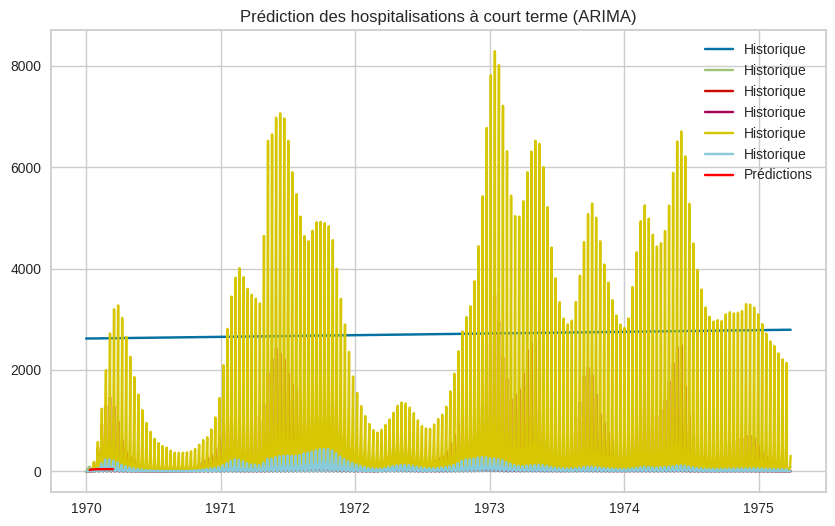

In [49]:
# Visualisation des prédictions

plt.figure(figsize=(10,6))
plt.plot(df_grouped, label='Historique')
plt.plot(pd.date_range(df_grouped.index[-1], periods=11, freq='W')[1:], forecast, label='Prédictions', color='red')
plt.legend()
plt.title("Prédiction des hospitalisations à court terme (ARIMA)")
plt.show()

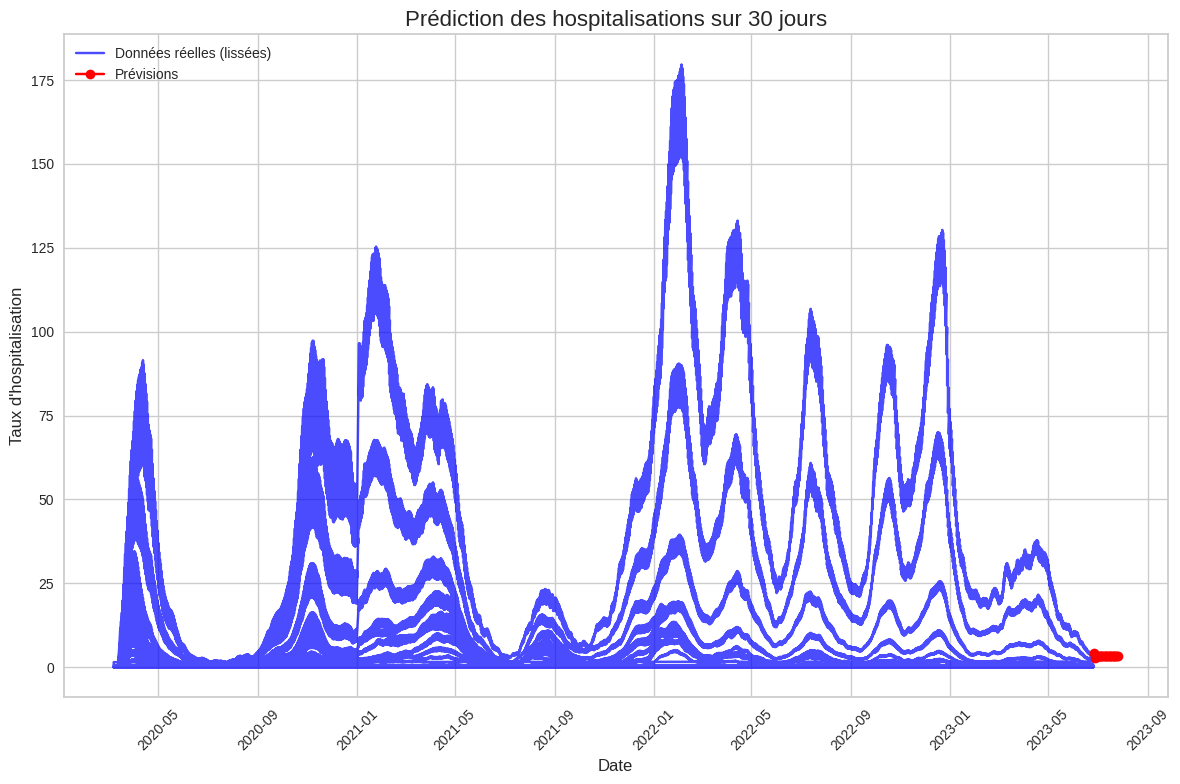

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculer une courbe lissée des données réelles (moyenne mobile)
serie_hospitalisations_rolling = serie_hospitalisations.rolling(window=7).mean()

# Créer les prévisions (par exemple 30 jours à venir)
forecast = model_fit.forecast(steps=30)

# Tracer les données historiques et les prévisions avec une courbe lissée
plt.figure(figsize=(12, 8))
plt.plot(serie_hospitalisations.index, serie_hospitalisations_rolling, label='Données réelles (lissées)', color='blue', alpha=0.7)
plt.plot(pd.date_range(serie_hospitalisations.index[-1], periods=31, freq='D')[1:], forecast, label='Prévisions', color='red', marker='o')

# Ajouter des éléments de visualisation
plt.title('Prédiction des hospitalisations sur 30 jours', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Taux d\'hospitalisation', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [50]:


## Modèle Prophet : Prédiction des hospitalisations avec prise en compte des saisons




In [83]:
!pip install prophet


In [87]:
!apt-get install -y python3-dev
!pip install Cython
!pip install prophet


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [88]:
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.1 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 kB)

In [95]:

# Réinitialiser l'index pour faire de 'jour' une colonne normale
df_reset = df.reset_index()

# Vérifier que 'jour' est bien devenu une colonne
print(df_reset.columns)


Index(['jour', 'fra', 'clage_90', 'PourAvec', 'tx_indic_7J_hosp',
       'tx_indic_7J_SC', 'tx_prev_hosp', 'tx_prev_SC', 'semaine', 'mois',
       'saison', 'pic_hosp', 'Erreur_Abs'],
      dtype='object')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp374os_v_/orfchofx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp374os_v_/dushw_b4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86965', 'data', 'file=/tmp/tmp374os_v_/orfchofx.json', 'init=/tmp/tmp374os_v_/dushw_b4.json', 'output', 'file=/tmp/tmp374os_v_/prophet_modelufedmhay/prophet_model-20250326144933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


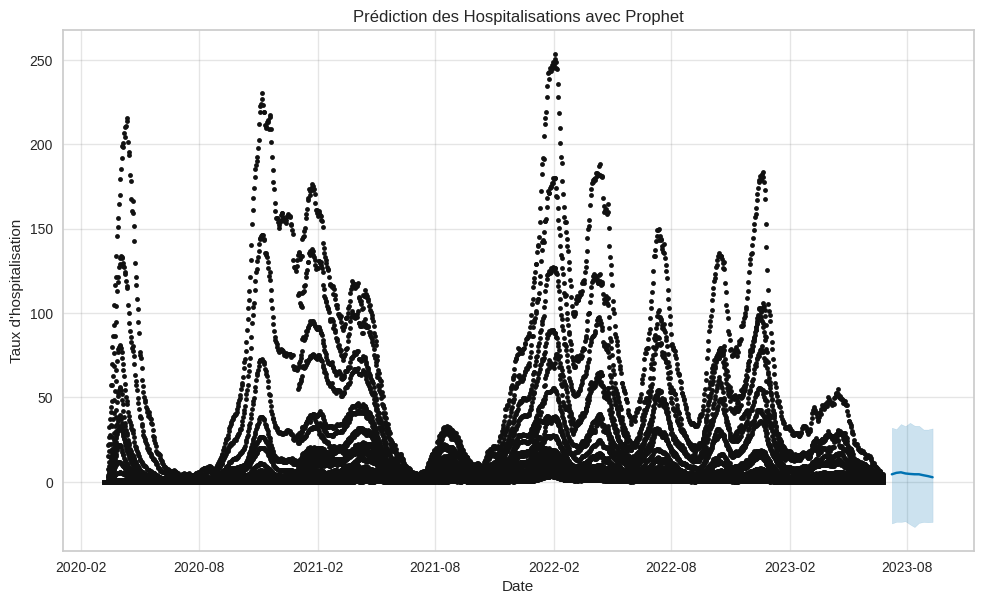

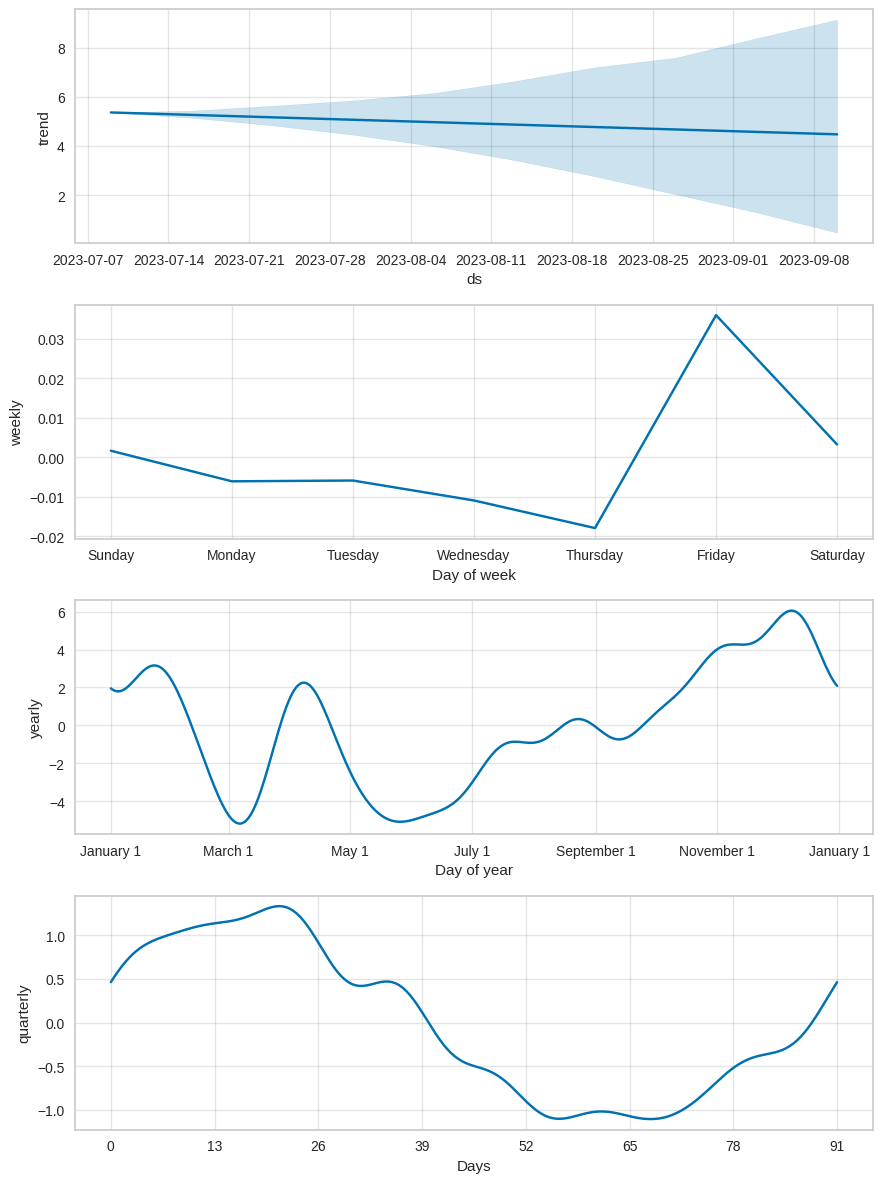

In [101]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Préparer les données pour Prophet
df_reset = df.reset_index()

# Sélectionner les colonnes 'jour' et 'tx_indic_7J_hosp'
df_prophet = df_reset[['jour', 'tx_indic_7J_hosp']].rename(columns={"jour": "ds", "tx_indic_7J_hosp": "y"})

# Créer le modèle Prophet
prophet_model = Prophet()

# Ajouter la saisonnalité supplémentaire pour tenir compte des saisons (Printemps, Été, Automne, Hiver)
prophet_model.add_seasonality(name='quarterly', period=365.25/4, fourier_order=8)  # saisonnalité trimestrielle

# Entraîner le modèle
prophet_model.fit(df_prophet)

# Générer les dates futures (10 semaines à partir de la dernière date)
last_date = df_prophet['ds'].max()
future_dates = pd.date_range(start=last_date, periods=11, freq='W')[1:]  # 10 nouvelles dates à prédire
future_df = pd.DataFrame(future_dates, columns=['ds'])

# Prédiction avec Prophet
forecast_prophet = prophet_model.predict(future_df)

# Visualisation des résultats
fig1 = prophet_model.plot(forecast_prophet)
plt.title('Prédiction des Hospitalisations avec Prophet')
plt.xlabel('Date')
plt.ylabel('Taux d\'hospitalisation')
plt.show()

# Visualisation des composants de la saisonnalité
fig2 = prophet_model.plot_components(forecast_prophet)
plt.show()


In [48]:
from prophet import Prophet


In [57]:

## Random Forest Regressor : Modèle basé sur l’apprentissage supervisé


In [58]:
# Vérifier le DataFrame avant agrégation
print(df.head())

# Agrégation par semaine et classe d'âge
df_grouped = df.groupby(['semaine', 'clage_90']).agg({
    'tx_indic_7J_hosp': 'sum',
    'tx_indic_7J_SC': 'sum',
    'tx_prev_hosp': 'sum',
    'tx_prev_SC': 'sum'
}).reset_index()

# Vérifier le DataFrame après agrégation
print(df_grouped.head())


           fra  clage_90  PourAvec  tx_indic_7J_hosp  tx_indic_7J_SC  \
jour                                                                   
2020-03-07  FR         0         0               0.0             0.0   
2020-03-07  FR         0         1               0.0             0.0   
2020-03-07  FR         0         2               0.0             0.0   
2020-03-08  FR         0         0               0.0             0.0   
2020-03-08  FR         0         1               0.0             0.0   

            tx_prev_hosp  tx_prev_SC  semaine  mois     saison  pic_hosp  
jour                                                                      
2020-03-07      1.169634    0.144528        1     3  Printemps     False  
2020-03-07      0.000000    0.000000        1     3  Printemps     False  
2020-03-07      0.000000    0.000000        1     3  Printemps     False  
2020-03-08      1.303732    0.175818        1     3  Printemps     False  
2020-03-08      0.000000    0.000000        1

In [59]:
# Définir les variables explicatives et la cible
features = ['clage_90', 'tx_indic_7J_SC', 'tx_prev_hosp', 'tx_prev_SC', 'semaine', 'mois']
target = 'tx_indic_7J_hosp'

# Séparer les variables explicatives (X) et la variable cible (y)
X = df[features]
y = df[target]

# Vérifier s'il y a des valeurs manquantes
print(X.isnull().sum())


clage_90          0
tx_indic_7J_SC    0
tx_prev_hosp      0
tx_prev_SC        0
semaine           0
mois              0
dtype: int64


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Diviser les données en ensemble d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Créer le modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
rf_model.fit(X_train, y_train)


# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 0.547752498950702
MSE: 4.693082901468242
R²: 0.991405585288202


In [61]:

##  3.4-Évaluation des modèles



In [62]:

##  Calcul du MAE et RMSE pour chaque modèle


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialisation des modèles
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()

# Entraînement des modèles
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Prédictions avec les modèles
predictions_rf = rf_model.predict(X_test)
predictions_lr = lr_model.predict(X_test)

# Calcul du MAE et du RMSE pour le modèle Random Forest
mae_rf = mean_absolute_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_rf))

# Calcul du MAE et du RMSE pour le modèle de régression linéaire
mae_lr = mean_absolute_error(y_test, predictions_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, predictions_lr))

# Afficher les résultats
print("Modèle Random Forest:")
print(f"MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}")

print("\nModèle Régression Linéaire:")
print(f"MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}")


Modèle Random Forest:
MAE: 0.5478, RMSE: 2.1664

Modèle Régression Linéaire:
MAE: 2.7544, RMSE: 6.0908


In [64]:
## Le modèle Random Forest montre une meilleure performance que la régression linéaire,
## avec des erreurs plus petites pour les deux mesures (MAE et RMSE).
## Cela suggère que le modèle Random Forest est plus adapté pour prédire les données dans mon cas .
## Random Forest semble être un meilleur choix ici.

In [65]:


## Le modèle Random Forest a surpassé la régression linéaire grâce à plusieurs de ses caractéristiques et avantages :

    ## Contrairement à la régression linéaire, qui est limité aux relations linéaires entre les variables,
    ## Random Forest peut modéliser des relations complexes et non linéaires, ce qui en fait un choix plus robuste
    ## pour des données ayant des interactions ou des structures complexe


    ## Random Forest est souvent plus résistant aux outliers et aux données aberrantes, car il utilise
    ## un ensemble d'arbres de décision, ce qui permet une plus grande stabilité et une généralisation meilleure aux nouvelles données.


    ## L'algorithme Random Forest crée plusieurs arbres de décision (ensemble), ce qui permet de compenser
    ## les erreurs des arbres individuels. Ce processus d'agrégation aide à améliorer la précision globale du modèle.


## Limites du Modèle Random Forest

    ## Contrairement à la régression linéaire, Random Forest est un modèle complexe et moins interprétable.
    ## Bien que Random Forest soit plus précis, il peut être plus coûteux en termes de ressources de calcul et de temps, en particulier
    ## avec un grand nombre d'arbres ou de grandes bases de données.
    ## Si le modèle est mal configuré, il peut être sujet à un overfitting, surtout si le nombre d'arbres et la profondeur des arbres ne
    ## sont pas bien régulés. Cela peut entraîner une perte de généralisation sur des données non vues.


## Limites du Modèle Régression Linéaire

    ## La régression linéaire suppose que la relation entre les variables explicatives et la variable cible est linéaire. Si cette hypothèse est
    ## fausse, le modèle peut avoir des performances médiocres.
    ## La régression linéaire est très sensible aux outliers. Un seul point aberrant peut affecter les résultats de manière significative.
    ## La régression linéaire ne prend pas bien en compte les interactions complexes entre les variables explicatives sans intervention manuelle pour inclure ces interactions.

In [66]:

## Visualisation des résultats


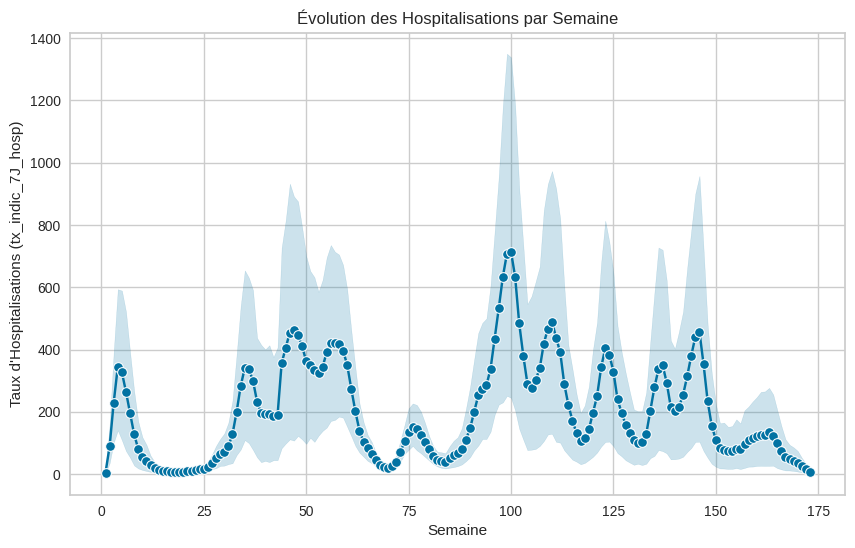

In [67]:
## Graphiques d’évolution des hospitalisations par semaine

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='semaine', y='tx_indic_7J_hosp', marker='o')
plt.title('Évolution des Hospitalisations par Semaine')
plt.xlabel('Semaine')
plt.ylabel('Taux d\'Hospitalisations (tx_indic_7J_hosp)')
plt.grid(True)
plt.show()


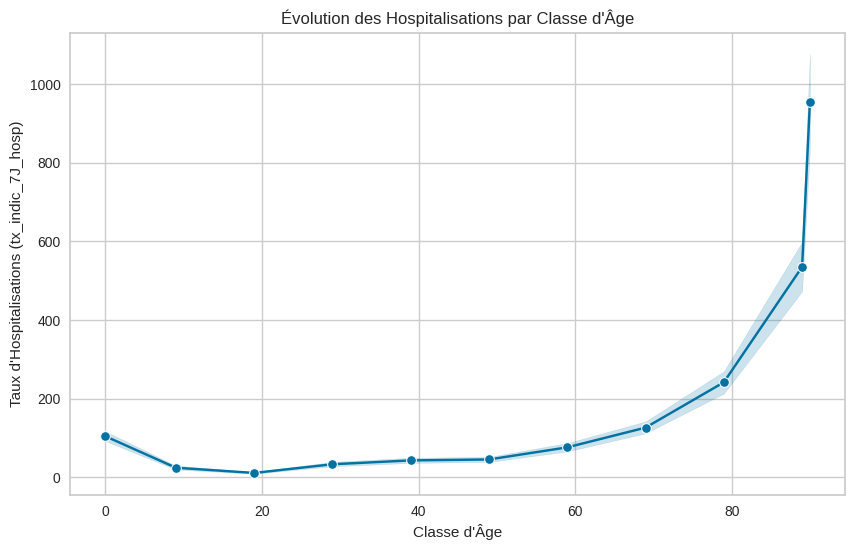

In [68]:
# Graphique de l'évolution des hospitalisations par classe d'âge

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='clage_90', y='tx_indic_7J_hosp', marker='o')
plt.title('Évolution des Hospitalisations par Classe d\'Âge')
plt.xlabel('Classe d\'Âge')
plt.ylabel('Taux d\'Hospitalisations (tx_indic_7J_hosp)')
plt.grid(True)
plt.show()


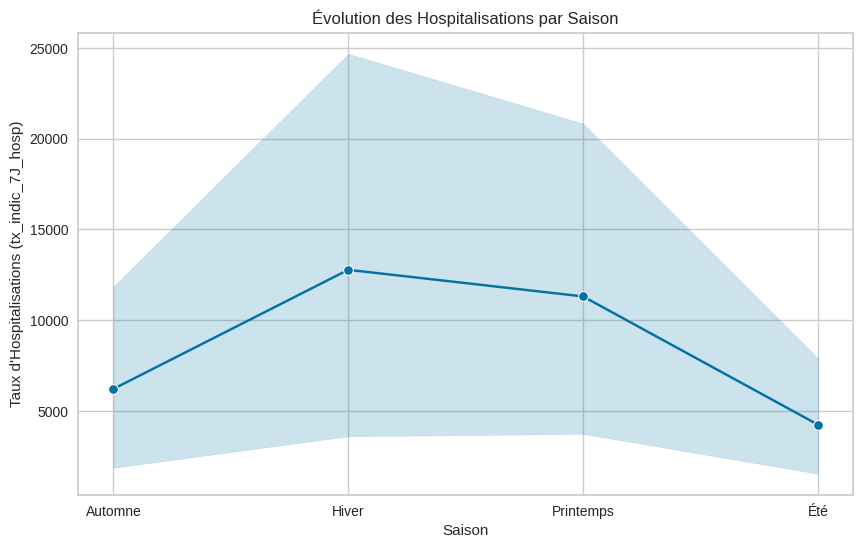

In [69]:
# Graphique de l'évolution des hospitalisations par saison

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_seasonal, x='saison', y='tx_indic_7J_hosp', marker='o')
plt.title('Évolution des Hospitalisations par Saison')
plt.xlabel('Saison')
plt.ylabel('Taux d\'Hospitalisations (tx_indic_7J_hosp)')
plt.grid(True)
plt.show()


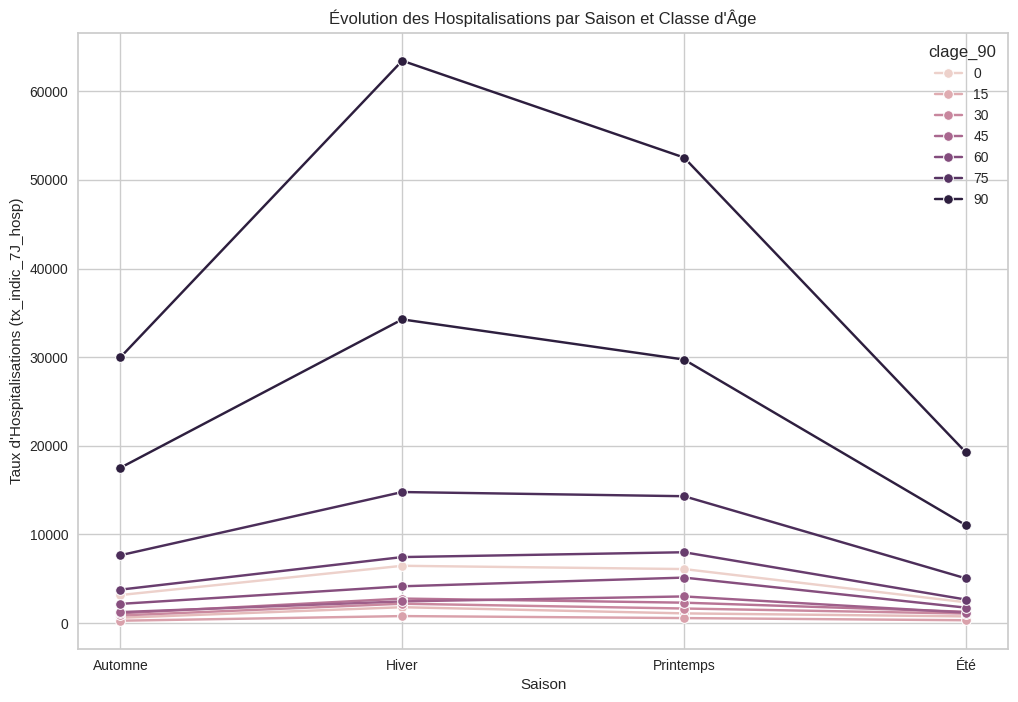

In [70]:
# Graphique combiné de l'évolution des hospitalisations par saison et classe d'âge
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_seasonal, x='saison', y='tx_indic_7J_hosp', hue='clage_90', marker='o')
plt.title('Évolution des Hospitalisations par Saison et Classe d\'Âge')
plt.xlabel('Saison')
plt.ylabel('Taux d\'Hospitalisations (tx_indic_7J_hosp)')
plt.grid(True)
plt.show()


In [71]:

## Tableaux comparant les résultats réels et prédits



In [72]:
##  Création du tableau comparatif

import pandas as pd

# Créer un DataFrame avec les résultats réels et prédits
results_df = pd.DataFrame({
    'Réels (y_test)': y_test,
    'Prédits (Random Forest)': predictions_rf,
    'Erreur Absolue (RF)': abs(y_test - predictions_rf),
    'Erreur Absolue (%) (RF)': 100 * abs(y_test - predictions_rf) / y_test
})

# Afficher les 10 premières lignes du tableau comparatif
print(results_df.head(10))


            Réels (y_test)  Prédits (Random Forest)  Erreur Absolue (RF)  \
jour                                                                       
2023-05-15        0.164810                 0.142186             0.022624   
2022-04-21       13.883634                14.125898             0.242265   
2020-12-26        0.000000                 0.000000             0.000000   
2021-09-06        0.668736                 0.879133             0.210396   
2021-07-13        0.334913                 0.333948             0.000965   
2021-12-21       85.362322                84.299478             1.062844   
2022-04-09        1.283514                 1.359562             0.076048   
2023-05-21        0.105949                 0.126867             0.020918   
2022-09-24        0.753418                 0.555125             0.198293   
2020-04-03       76.988726                79.663949             2.675223   

            Erreur Absolue (%) (RF)  
jour                                 
2023-05-15 

In [73]:
## Tableau comparatif pour la régression linéaire

# Ajouter les résultats de la régression linéaire
results_df['Prédits (Régression Linéaire)'] = predictions_lr
results_df['Erreur Absolue (LR)'] = abs(y_test - predictions_lr)
results_df['Erreur Absolue (%) (LR)'] = 100 * abs(y_test - predictions_lr) / y_test

# Afficher les 10 premières lignes du tableau comparatif avec les deux modèles
print(results_df.head(10))


            Réels (y_test)  Prédits (Random Forest)  Erreur Absolue (RF)  \
jour                                                                       
2023-05-15        0.164810                 0.142186             0.022624   
2022-04-21       13.883634                14.125898             0.242265   
2020-12-26        0.000000                 0.000000             0.000000   
2021-09-06        0.668736                 0.879133             0.210396   
2021-07-13        0.334913                 0.333948             0.000965   
2021-12-21       85.362322                84.299478             1.062844   
2022-04-09        1.283514                 1.359562             0.076048   
2023-05-21        0.105949                 0.126867             0.020918   
2022-09-24        0.753418                 0.555125             0.198293   
2020-04-03       76.988726                79.663949             2.675223   

            Erreur Absolue (%) (RF)  Prédits (Régression Linéaire)  \
jour             

In [74]:
# Affichage complet du tableau
print(results_df)


            Réels (y_test)  Prédits (Random Forest)  Erreur Absolue (RF)  \
jour                                                                       
2023-05-15        0.164810                 0.142186             0.022624   
2022-04-21       13.883634                14.125898             0.242265   
2020-12-26        0.000000                 0.000000             0.000000   
2021-09-06        0.668736                 0.879133             0.210396   
2021-07-13        0.334913                 0.333948             0.000965   
...                    ...                      ...                  ...   
2023-02-02        0.535465                 0.508017             0.027448   
2020-11-10      143.315804               137.652008             5.663796   
2021-02-02        0.904119                 0.966553             0.062434   
2020-05-05        2.199494                 2.639054             0.439560   
2022-01-30       54.936767                53.717062             1.219705   

           

In [79]:
import pandas as pd

df['Erreur_Abs'] = abs(df['tx_indic_7J_hosp'] - df['tx_prev_hosp'])

# Affiche le DataFrame avec la nouvelle colonne
print(df.head())


           fra  clage_90  PourAvec  tx_indic_7J_hosp  tx_indic_7J_SC  \
jour                                                                   
2020-03-07  FR         0         0               0.0             0.0   
2020-03-07  FR         0         1               0.0             0.0   
2020-03-07  FR         0         2               0.0             0.0   
2020-03-08  FR         0         0               0.0             0.0   
2020-03-08  FR         0         1               0.0             0.0   

            tx_prev_hosp  tx_prev_SC  semaine  mois     saison  pic_hosp  \
jour                                                                       
2020-03-07      1.169634    0.144528        1     3  Printemps     False   
2020-03-07      0.000000    0.000000        1     3  Printemps     False   
2020-03-07      0.000000    0.000000        1     3  Printemps     False   
2020-03-08      1.303732    0.175818        1     3  Printemps     False   
2020-03-08      0.000000    0.000000   

In [75]:

df

,fra,clage_90,PourAvec,tx_indic_7J_hosp,tx_indic_7J_SC,tx_prev_hosp,tx_prev_SC,semaine,mois,saison,pic_hosp
jour,,,,,,,,,,,
2020-03-07,FR,0,0,0.000000,0.00000,1.169634,0.144528,1,3,Printemps,False
2020-03-07,FR,0,1,0.000000,0.00000,0.000000,0.000000,1,3,Printemps,False
2020-03-07,FR,0,2,0.000000,0.00000,0.000000,0.000000,1,3,Printemps,False
2020-03-08,FR,0,0,0.000000,0.00000,1.303732,0.175818,1,3,Printemps,False
2020-03-08,FR,0,1,0.000000,0.00000,0.000000,0.000000,1,3,Printemps,False
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-25,FR,90,1,2.750531,0.10579,97.114915,1.375266,173,6,Été,False
2023-06-25,FR,90,2,1.692635,0.00000,54.270100,0.211579,173,6,Été,False
2023-06-26,FR,90,0,4.125797,0.10579,151.702384,1.481055,173,6,Été,False


In [76]:
# Enregistrer les modifications dans un nouveau fichier CSV
df.to_csv('covid_modifie.csv', index=False)


In [77]:
import pandas as pd

In [81]:
df

,fra,clage_90,PourAvec,tx_indic_7J_hosp,tx_indic_7J_SC,tx_prev_hosp,tx_prev_SC,semaine,mois,saison,pic_hosp,Erreur_Abs
jour,,,,,,,,,,,,
2020-03-07,FR,0,0,0.000000,0.00000,1.169634,0.144528,1,3,Printemps,False,1.169634
2020-03-07,FR,0,1,0.000000,0.00000,0.000000,0.000000,1,3,Printemps,False,0.000000
2020-03-07,FR,0,2,0.000000,0.00000,0.000000,0.000000,1,3,Printemps,False,0.000000
2020-03-08,FR,0,0,0.000000,0.00000,1.303732,0.175818,1,3,Printemps,False,1.303732
2020-03-08,FR,0,1,0.000000,0.00000,0.000000,0.000000,1,3,Printemps,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-25,FR,90,1,2.750531,0.10579,97.114915,1.375266,173,6,Été,False,94.364384
2023-06-25,FR,90,2,1.692635,0.00000,54.270100,0.211579,173,6,Été,False,52.577465
2023-06-26,FR,90,0,4.125797,0.10579,151.702384,1.481055,173,6,Été,False,147.576587


In [75]:
df

,fra,jour,clage_90,PourAvec,tx_indic_7J_hosp,tx_indic_7J_SC,tx_prev_hosp,tx_prev_SC,semaine,mois,saison,pic_hosp,Erreur_Abs
0,FR,2020-03-07,0,0,0.000000,0.00000,1.169634,0.144528,1,3,Printemps,False,1.169634
1,FR,2020-03-07,0,1,0.000000,0.00000,0.000000,0.000000,1,3,Printemps,False,0.000000
2,FR,2020-03-07,0,2,0.000000,0.00000,0.000000,0.000000,1,3,Printemps,False,0.000000
3,FR,2020-03-08,0,0,0.000000,0.00000,1.303732,0.175818,1,3,Printemps,False,1.303732
4,FR,2020-03-08,0,1,0.000000,0.00000,0.000000,0.000000,1,3,Printemps,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39826,FR,2023-06-25,90,1,2.750531,0.10579,97.114915,1.375266,173,6,Été,False,94.364384
39827,FR,2023-06-25,90,2,1.692635,0.00000,54.270100,0.211579,173,6,Été,False,52.577465
39828,FR,2023-06-26,90,0,4.125797,0.10579,151.702384,1.481055,173,6,Été,False,147.576587
39829,FR,2023-06-26,90,1,2.644742,0.10579,97.432284,1.269476,173,6,Été,False,94.787543


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>